In [1]:
import sympy
import utils
sympy.init_printing()

# Model Basline Information

The Model is in the form:

$$ y(s) = G(s)u(s) + G_d(s)d(s)$$

where,

$$ y(s) = \begin{bmatrix} y_1 = overhead \space ethanol \space fraction \\ y_2 = side \space stream \space ethanol \space fraction \\ y_3 = tray \space 19 \space temperature \end{bmatrix}$$

$$ G(s) = \begin{bmatrix} G_{11} & G_{12} & G_{13} \\ G_{21} & G_{22} & G_{23} \\ G_{31} & G_{32} & G_{33} \end{bmatrix}$$

$$ u(s) = \begin{bmatrix} u_1 = reflow \space flow \space rate \\ u_2 = side \space stream \space pressure \\ u_3 = reboiler \space stream \space pressure \end{bmatrix}$$

$$ G_d(s) = \begin{bmatrix} G_{d11} & G_{d12} \\ G_{d21} & G_{d22} \\ G_{d31} & G_{d32} \end{bmatrix}$$

$$ d(s) = \begin{bmatrix} d_1 = feed \space flow \space rate \\ d_2 = feed \space temperature \end{bmatrix}$$

The model is already linearized and represented in terms of deviation variables. The steady-state values of the various parameters are as follows:

|Model Inputs|Values|Model Outputs|Values|Model Disturbances|Values|
|------------|------|-------------|------|------------------|------|
|u1          |0.18  |y1           |0.70  |d1                |0.8   |      
|u2          |0.046 |y2           |0.52  |d2                |78    |
|u3          |20    |y3           |92    |                 

System constraints are given for the input variables. Scaling should therefore be carried out on the system. 

# Defining the System (as given)

In [2]:
s = sympy.symbols('s')
t = sympy.Symbol('y', positive=True)

In [3]:
G11 = 0.66*sympy.exp(-2.6*s)/(6.7*s + 1)
G12 = -0.61*sympy.exp(-3.5*s)/(8.64*s + 1)
G13 = -0.0049*sympy.exp(-s)/(9.06*s + 1)
G21 = 1.11*sympy.exp(-6.5*s)/(3.25*s + 1)
G22 = -2.36*sympy.exp(-3*s)/(5*s + 1)
G23 = -0.01*sympy.exp(-1.2*s)/(7.09*s + 1)
G31 = -34.68*sympy.exp(-9.2*s)/(8.15*s + 1)
G32 = 46.2*sympy.exp(-9.4*s)/(10.9*s + 1)
G33 = 0.87*(11.61*s + 1)*sympy.exp(-s)/((3.89*s + 1)*(18.8*s + 1))

In [4]:
Gd11 = 0.14*sympy.exp(-12*s)/(6.2*s + 1)
Gd12 = -0.0011*(26.32*s + 1)*sympy.exp(-s)/((7.85*s + 1)*(14.63*s + 1))
Gd21 = 0.53*sympy.exp(-10.5*s)/(6.9*s + 1)
Gd22 = -0.0032*(19.62*s + 1)*sympy.exp(-3.44*s)/((7.29*s + 1)*(8.94*s + 1))
Gd31 = -11.54*sympy.exp(-0.6*s)/(7.01*s + 1)
Gd32 = 0.32*sympy.exp(-2.6*s)/(7.76*s +1)

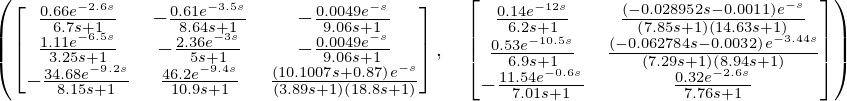

In [5]:
G_hat = sympy.Matrix([[G11, G12, G13],
                  [G21, G22, G13],
                  [G31, G32, G33]])

Gd_hat = sympy.Matrix([[Gd11, Gd12],
                   [Gd21, Gd22],
                   [Gd31, Gd32]])

G_hat, Gd_hat

# Scaling the Sytem

The following table provides the constraints of the input/manipulated variables. The constraints are mainly due to operational and physical constraints (control valves being fully open and closed, rated safety margins on pressure).

|Manipulated Variable       |Lower Constraint|Upper Constraint|Steady State Value|
|---------------------------|----------------|----------------|------------------|
|u1, Reflux Flow Rate       |0.068           |0.245           |0.18              |
|u2, Side Stream Flow Rate  |0.00694         |0.1             |0.046             |
|u3, Reboiler Steam Pressure|15.6            |34              |20               

The following table sumurises the ranges of the controlled/measured variables:

|Controlled Variable                  |Maximum Set Point Change|Steady State Value|
|-------------------------------------|------------------------|------------------|
|y1, Overhead Mole Fraction Ethanol   |0.05                    |0.7               |
|y2, Side Stream Mole Fraction Ethanol|0.1                     |0.52              |
|y3, Temperature on Tray #19          |8                       |92              

The following table summarises the ranges for the disturbance variables:

|Disturbance Variable       |Lower Constraint|Upper Constraint|Steady State Value|
|---------------------------|----------------|----------------|------------------|
|d1, Feed Flow Rate         |0.6             |1.1             |0.8               |
|d2, Feed Temperature       |50              |102             |78             

In [12]:
u1_max = min(0.245-0.18, 0.18-0.068)
u2_max = min(0.1-0.046, 0.046 - 0.00694)
u3_max = min(34-20, 20-15.6)

y1_max = 0.05
y2_max = 0.1
y3_max = 8

d1_max = max(1.1-0.8, 0.8-0.6)
d2_max = max(102-78, 78-50)

De = sympy.diag(0.01,0.01, 4)
Du = sympy.Matrix([[u1_max, 0, 0], [0, u2_max, 0], [0, 0, u3_max]])
Dd = sympy.Matrix([[d1_max, 0], [0, d2_max]])
Dr = sympy.Matrix([[y1_max, 0, 0], [0, y2_max, 0], [0, 0, y3_max]])

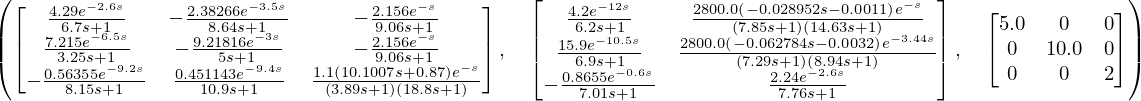

In [13]:
G = De.inv()*G_hat*Du
Gd = De.inv()*Gd_hat*Dd
R = De.inv()*Dr
G,Gd,R